In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
Training_dict = {}
Testing_dict = {}

for file in sorted(os.listdir(r"/Users/matthewweiner/Downloads/dataset/test/data")):
     Testing_dict[file] = pd.read_csv(r"/Users/matthewweiner/Downloads/dataset/test/data/" + file, header = 0, sep = ',', nrows=100)
    
    
for file in sorted(os.listdir(r"/Users/matthewweiner/Downloads/dataset/train/data")):
    Training_dict[file] = pd.read_csv(r"/Users/matthewweiner/Downloads/dataset/train/data/" + file, header = 0, sep = ',', nrows=100)
    
# Read Labels for test set 
test_label = pd.read_excel(r"/Users/matthewweiner/Downloads/dataset/test/labels_spacecraft.xlsx", header = 1)

# Read Labels for training set 
train_label = pd.read_excel(r"/Users/matthewweiner/Downloads/dataset/train/labels.xlsx", header = 1)

training_keys = sorted(os.listdir(r"/Users/matthewweiner/Downloads/dataset/train/data"))
testing_keys = sorted(os.listdir(r"/Users/matthewweiner/Downloads/dataset/test/data"))

answers = pd.read_csv(r"/Users/matthewweiner/Downloads/test data/answer.csv", header = 0, sep = ',', nrows=100)

y_train = []
SV1_OR = []
SV2_OR = []
SV3_OR = []
SV4_OR = []

for index, row in train_label.iterrows():
    SV1_OR.append(train_label["SV1"][index])
    SV2_OR.append(train_label["SV2"][index])
    SV3_OR.append(train_label["SV3"][index])
    SV4_OR.append(train_label["SV4"][index])
    
    if train_label["SV1"][index] != 100:
        y_train.append(1)
    elif train_label["SV2"][index] != 100:
        y_train.append(2)
    elif train_label["SV3"][index] != 100:
        y_train.append(3)
    elif train_label["SV4"][index] != 100:
        y_train.append(4)
    else:
        y_train.append(0)

y_test = []
SV1_OR_T = []
SV2_OR_T = []
SV3_OR_T = []
SV4_OR_T = []
for index, row in answers.iterrows():
    SV1_OR_T.append(answers["task5"][index])
    SV2_OR_T.append(answers["task5"][index])
    SV3_OR_T.append(answers["task5"][index])
    SV4_OR_T.append(answers["task5"][index])
  
    if answers["Test condition"][index] == "SV1 valve fault":
        y_test.append(1)
    elif answers["Test condition"][index] == "SV2 valve fault":
        y_test.append(2)
    elif answers["Test condition"][index] == "SV3 valve fault":
        y_test.append(3)
    elif answers["Test condition"][index] == "SV4 valve fault":
        y_test.append(4)
    else:
        y_test.append(0)

print(y_train, y_test)

print(len(y_train))

OR_Train = []
OR_Test = []

for i in range(len(SV1_OR)):
    min_train = min(SV1_OR[i], SV2_OR[i], SV3_OR[i], SV4_OR[i])
    OR_Train.append(min_train)

for i in range(len(SV1_OR_T)):
    min_test = min(SV1_OR_T[i], SV2_OR_T[i], SV3_OR_T[i], SV4_OR_T[i])
    OR_Test.append(min_test)

print(OR_Train, OR_Test)

print(len(OR_Train))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0]
177
[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,

In [3]:
# Preprocess data
def preprocess_data(data_dict, labels):
    X = []
    for key, value in data_dict.items():
        X.append(value.values)
    X = np.array(X)
    X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)  # Add a channel dimension for Conv1D
    y = np.array(labels)
    return X, y

X_train, y_train = preprocess_data(Training_dict, y_train)
X_test, y_test = preprocess_data(Testing_dict, y_test)

In [4]:
# Filter training data
X_trainV = X_train[y_train != 0]
y_trainV = y_train[y_train != 0]

# Filter testing data
X_testV = X_test[y_test != 0]
y_testV = y_test[y_test != 0]

In [5]:
print(X_trainV.shape)
print(y_trainV.shape)
print(X_testV.shape)
print(y_testV.shape)

(48, 100, 8, 1)
(48,)
(10, 100, 8, 1)
(10,)


In [6]:
Max_values = [[] for _ in range(4)]
Time_min = [[] for _ in range(4)]
Pressure_Drop = [[] for _ in range(4)]

Min_values_test = [[] for _ in range(4)]
Time_min_test = [[] for _ in range(4)]
Pressure_Drop_test = [[] for _ in range(4)]


for trial_index in range(X_trainV.shape[0]):  # Loop through all 48 trials
    trial_data = X_trainV[trial_index] 
    data = trial_data.reshape(100, 8)
    time = data[:, 0]
    P3 = data[:, 3]
    P4 = data[:, 4]
    P6 = data[:, 6]
    P7 = data[:, 7]
    
    Max_values[0].append(np.max(P3))
    Max_values[1].append(np.max(P4))
    Max_values[2].append(np.max(P6))
    Max_values[3].append(np.max(P7))
    
    Time_min[0].append(time[np.argmin(P3)])
    Time_min[1].append(time[np.argmin(P4)])
    Time_min[2].append(time[np.argmin(P6)])
    Time_min[3].append(time[np.argmin(P7)])
    
    Pressure_Drop[0].append(2 - np.min(P3))
    Pressure_Drop[1].append(2 - np.min(P4))
    Pressure_Drop[2].append(2 - np.min(P6))
    Pressure_Drop[3].append(2 - np.min(P7))

    
for trial_index in range(X_testV.shape[0]):  # Loop through all 48 trials
    trial_data = X_testV[trial_index] 
    data = trial_data.reshape(100, 8)
    time = data[:, 0]
    P3 = data[:, 3]
    P4 = data[:, 4]
    P6 = data[:, 6]
    P7 = data[:, 7]
    
    Min_values_test[0].append(np.min(P3))
    Min_values_test[1].append(np.min(P4))
    Min_values_test[2].append(np.min(P6))
    Min_values_test[3].append(np.min(P7))
    
    Time_min_test[0].append(time[np.argmin(P3)])
    Time_min_test[1].append(time[np.argmin(P4)])
    Time_min_test[2].append(time[np.argmin(P6)])
    Time_min_test[3].append(time[np.argmin(P7)])
    
    Pressure_Drop_test[0].append(2 - np.min(P3))
    Pressure_Drop_test[1].append(2 - np.min(P4))
    Pressure_Drop_test[2].append(2 - np.min(P6))
    Pressure_Drop_test[3].append(2 - np.min(P7))
    

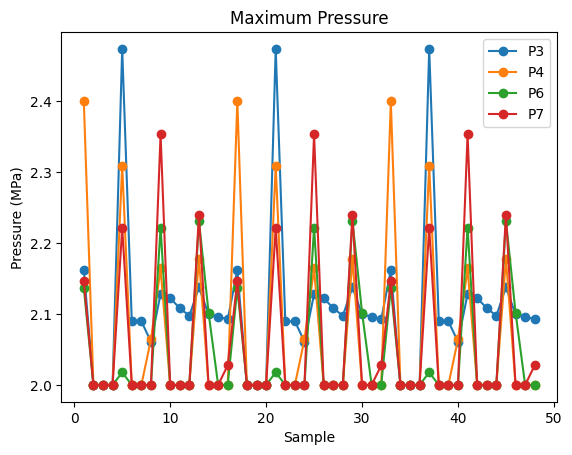

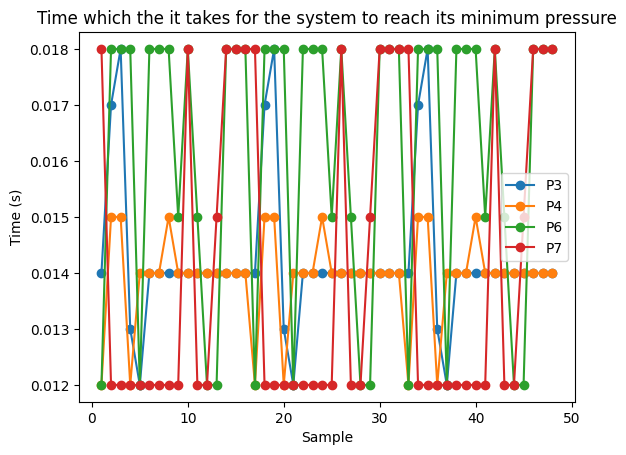

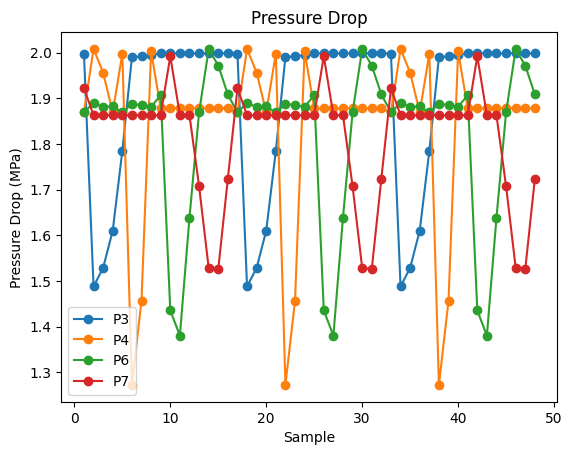

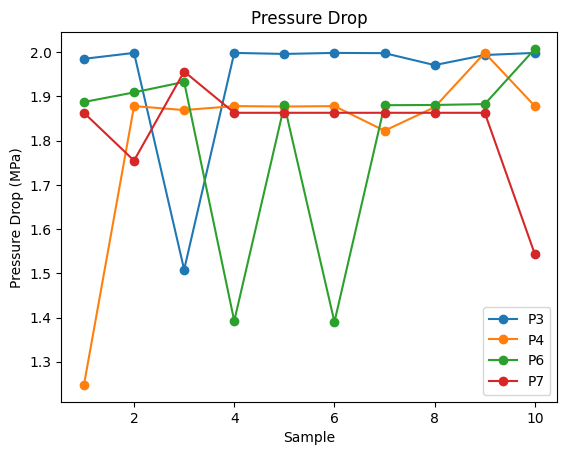

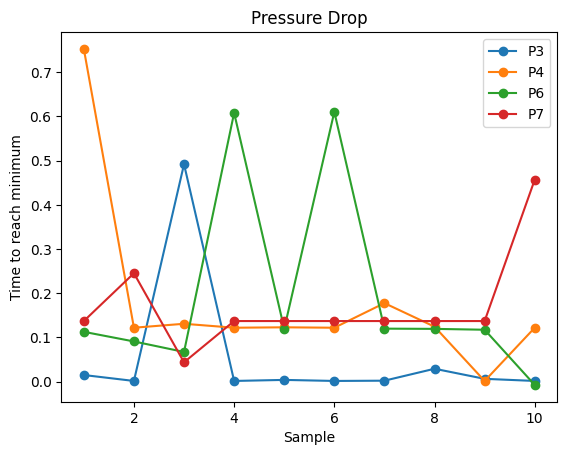

In [7]:
def plot_features(values, title, y):
    # Create a list of indices from 1 to the length of MaxHealth (or MaxUnhealth)
    indices = list(range(1, len(values[0]) + 1))

    # Plot MaxHealth and MaxUnhealth on the same graph

    plt.plot(indices, values[0], label='P3', marker='o')
    plt.plot(indices, values[1], label='P4', marker='o')
    plt.plot(indices, values[2], label='P6', marker='o')
    plt.plot(indices, values[3], label='P7', marker='o')

    # Label the axes and add a legend
    plt.xlabel('Sample')
    plt.ylabel(f'{y}')
    plt.title(f'{title}')
    plt.legend()
    # Show the plot
    plt.show()
    
plot_features(Max_values, "Maximum Pressure", "Pressure (MPa)")
plot_features(Time_min, "Time which the it takes for the system to reach its minimum pressure", "Time (s)")
plot_features(Pressure_Drop, "Pressure Drop", "Pressure Drop (MPa)")
plot_features(Pressure_Drop_test, "Pressure Drop", "Pressure Drop (MPa)")
plot_features(Min_values_test, "Pressure Drop", "Time to reach minimum")

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# PDTrain = pd.DataFrame({
#     'Max_values P1': Max_values[0],
#     'Time_min P1': Time_min[0],
#     'Pressure_Drop P1': Pressure_Drop[0],
#     'Max_values P2': Max_values[1],
#     'Time_min P2': Time_min[1],
#     'Pressure_Drop P2': Pressure_Drop[1],
#     'Max_values P3': Max_values[2],
#     'Time_min P3': Time_min[2],
#     'Pressure_Drop P3': Pressure_Drop[2],
#     'Max_values P4': Max_values[3],
#     'Time_min P4': Time_min[3],
#     'Pressure_Drop P4': Pressure_Drop[3],
# })

# PDTest = pd.DataFrame({
#     'Max_values P1': Max_values_test[0],
#     'Time_min P1': Time_min_test[0],
#     'Pressure_Drop P1': Pressure_Drop_test[0],
#     'Max_values P2': Max_values_test[1],
#     'Time_min P2': Time_min_test[1],
#     'Pressure_Drop P2': Pressure_Drop_test[1],
#     'Max_values P3': Max_values_test[2],
#     'Time_min P3': Time_min_test[2],
#     'Pressure_Drop P3': Pressure_Drop_test[2],
#     'Max_values P4': Max_values_test[3],
#     'Time_min P4': Time_min_test[3],
#     'Pressure_Drop P4': Pressure_Drop_test[3],
# })
PDTrain = pd.DataFrame({
    'Pressure_Drop P1': Pressure_Drop[0],
    'Pressure_Drop P2': Pressure_Drop[1],
    'Pressure_Drop P3': Pressure_Drop[2],
    'Pressure_Drop P4': Pressure_Drop[3],
})

PDTest = pd.DataFrame({
    'Pressure_Drop P1': Pressure_Drop_test[0],
    'Pressure_Drop P2': Pressure_Drop_test[1],
    'Pressure_Drop P3': Pressure_Drop_test[2],
    'Pressure_Drop P4': Pressure_Drop_test[3],
})
scaler = StandardScaler()
X_train = scaler.fit_transform(PDTrain)
X_test = scaler.transform(PDTest)

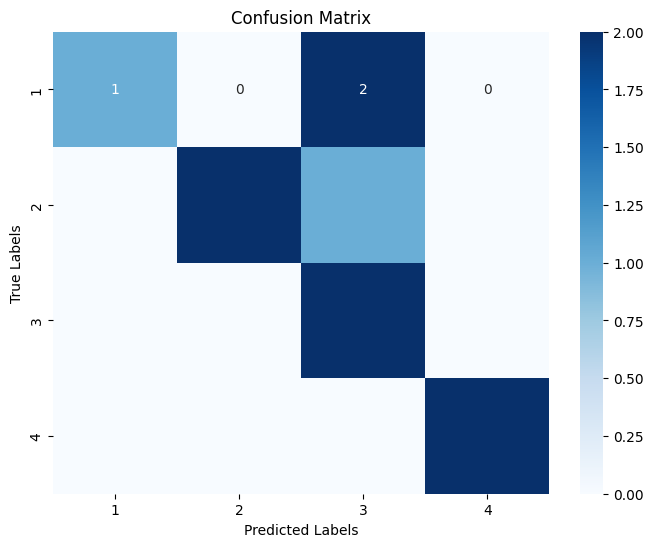

Confusion Matrix:
[[1 0 2 0]
 [0 2 1 0]
 [0 0 2 0]
 [0 0 0 2]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.33      0.50         3
           2       1.00      0.67      0.80         3
           3       0.40      1.00      0.57         2
           4       1.00      1.00      1.00         2

    accuracy                           0.70        10
   macro avg       0.85      0.75      0.72        10
weighted avg       0.88      0.70      0.70        10



In [9]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X_train, y_trainV)

y_pred = svm.predict(X_test)



# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_testV, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=svm.classes_,
            yticklabels=svm.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()



# Calculate and print confusion matrix
conf_mat = confusion_matrix(y_testV, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Print classification report
class_report = classification_report(y_testV, y_pred)
print("Classification Report:")
print(class_report)


In [10]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

# Create an SVM model
svm_model = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_trainV)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters
print("Best Hyperparameters:", best_params)

# Use the best parameters to train the final SVM model
final_svm = SVC(**best_params).fit(X_train, y_trainV)

# Make predictions on the test set
y_pred_final = final_svm.predict(X_test)

# Print the confusion matrix and classification report for the final model
conf_mat_final = confusion_matrix(y_testV, y_pred_final)
print("Confusion Matrix:")
print(conf_mat_final)

class_report_final = classification_report(y_testV, y_pred_final)
print("Classification Report:")
print(class_report_final)

Best Hyperparameters: {'C': 0.1, 'gamma': 10, 'kernel': 'poly'}
Confusion Matrix:
[[1 0 2 0]
 [0 2 1 0]
 [0 0 2 0]
 [0 0 0 2]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.33      0.50         3
           2       1.00      0.67      0.80         3
           3       0.40      1.00      0.57         2
           4       1.00      1.00      1.00         2

    accuracy                           0.70        10
   macro avg       0.85      0.75      0.72        10
weighted avg       0.88      0.70      0.70        10



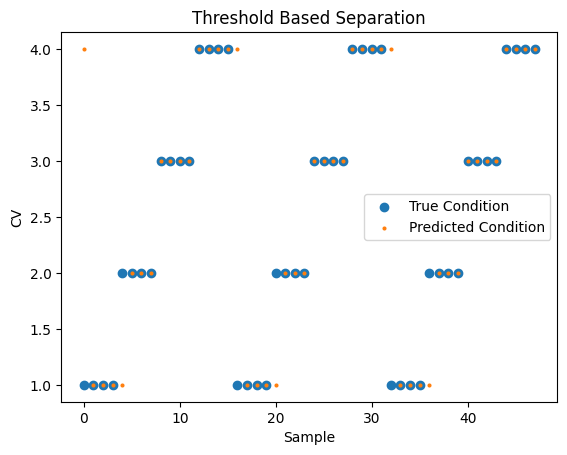

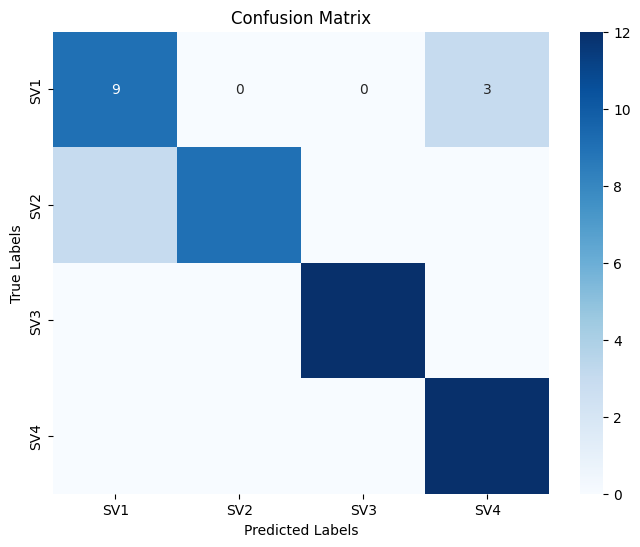

[1.9848425534312326, 1.998240570144731, 1.5082474671411237, 1.9982405615577477, 1.9958759693077948, 1.998240472087083, 1.9976438521511286, 1.970659805949933, 1.993453036333117, 1.998240530454024]


In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def threshold_classifier(Pressure_Drop):
    label_condition = []
    label_pred = []

    for i in range(48):
        P3 = abs(1.9982 - Pressure_Drop[0][i])
        P4 = abs(1.8769 - Pressure_Drop[1][i])
        P6 = abs(1.88 - Pressure_Drop[2][i])
        P7 = abs(1.8628 - Pressure_Drop[3][i])
        
        if P3 > max(P4, P6, P7):
            label_condition.append("Fault SV1")
            label_pred.append(1)
        elif P4 > max(P3, P6, P7):
            label_condition.append("Fault SV2")
            label_pred.append(2)
        elif P6 > max(P3, P4, P7):
            label_condition.append("Fault SV3")
            label_pred.append(3)
        elif P7 > max(P3, P4, P6):
            label_condition.append("Fault SV4")
            label_pred.append(4)
  
    return label_pred, label_condition

train_label_pred, train_label_condition = threshold_classifier(Pressure_Drop)
plt.scatter(np.arange(48), y_trainV)
plt.scatter(np.arange(48), train_label_pred, marker='.', s=15)
plt.legend({"True Condition", "Predicted Condition"})
plt.ylabel("CV")
plt.xlabel("Sample")
plt.title("Threshold Based Separation")
plt.show()

cm = confusion_matrix(y_trainV, train_label_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['SV1', 'SV2', 'SV3', "SV4"], yticklabels=['SV1', 'SV2', 'SV3', "SV4"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print(Pressure_Drop_test[0])

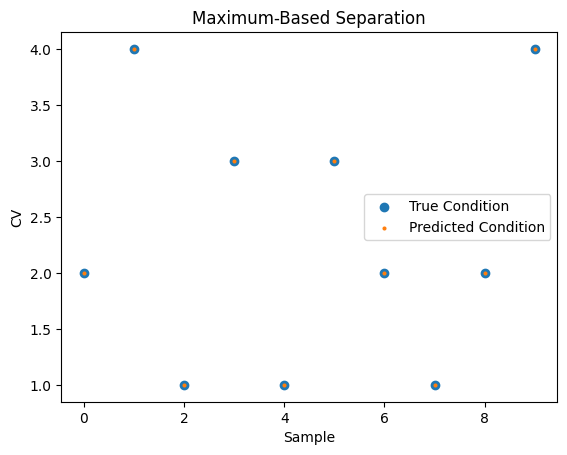

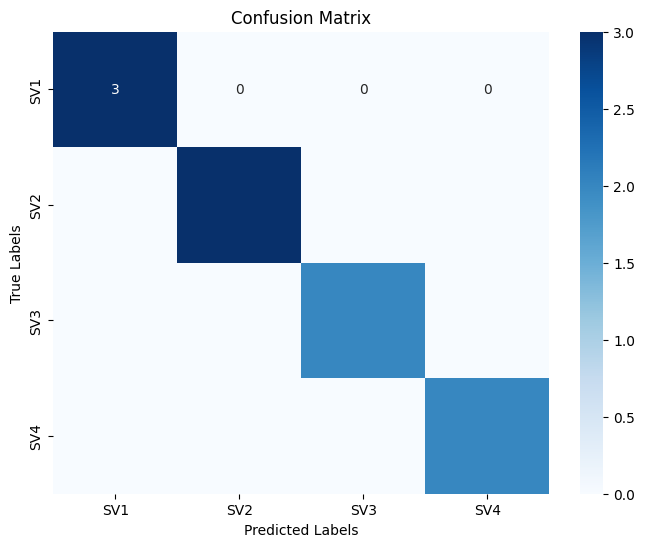

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def threshold_classifier(Pressure_Drop_test):
    label_condition = []
    label_pred = []

    for i in range(10):
        P3 = abs(1.9982 - Pressure_Drop_test[0][i])
        P4 = abs(1.8769 - Pressure_Drop_test[1][i])
        P6 = abs(1.88 - Pressure_Drop_test[2][i])
        P7 = abs(1.8628 - Pressure_Drop_test[3][i])
        
        if P3 > max(P4, P6, P7):
            label_condition.append("Fault SV1")
            label_pred.append(1)
        elif P4 > max(P3, P6, P7):
            label_condition.append("Fault SV2")
            label_pred.append(2)
        elif P6 > max(P3, P4, P7):
            label_condition.append("Fault SV3")
            label_pred.append(3)
        elif P7 > max(P3, P4, P6):
            label_condition.append("Fault SV4")
            label_pred.append(4)
  
    return label_pred, label_condition

test_label_pred, test_label_condition = threshold_classifier(Pressure_Drop_test)
plt.scatter(np.arange(10), y_testV)
plt.scatter(np.arange(10), test_label_pred, marker='.', s=15)
plt.legend({"True Condition", "Predicted Condition"})
plt.ylabel("CV")
plt.xlabel("Sample")
plt.title("Maximum-Based Separation")
plt.show()

cm = confusion_matrix(y_testV, test_label_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['SV1', 'SV2', 'SV3', "SV4"], yticklabels=['SV1', 'SV2', 'SV3', "SV4"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [13]:
# OPENING RATIO CALCULATION

In [14]:
Pressure_Drop_OR = [[] for _ in range(4)]

Pressure_Drop_test_OR = [[] for _ in range(4)]

X_train, y_train = preprocess_data(Training_dict, y_train)
X_test, y_test = preprocess_data(Testing_dict, y_test)

for trial_index in range(X_train.shape[0]):  # Loop through all 48 trials
    trial_data = X_train[trial_index] 
    data = trial_data.reshape(100, 8)
    time = data[:, 0]
    P3 = data[:, 3]
    P4 = data[:, 4]
    P6 = data[:, 6]
    P7 = data[:, 7]
    
    Pressure_Drop_OR[0].append(2 - np.min(P3))
    Pressure_Drop_OR[1].append(2 - np.min(P4))
    Pressure_Drop_OR[2].append(2 - np.min(P6))
    Pressure_Drop_OR[3].append(2 - np.min(P7))

    
for trial_index in range(X_test.shape[0]):  # Loop through all 48 trials
    trial_data = X_test[trial_index] 
    data = trial_data.reshape(100, 8)
    time = data[:, 0]
    P3 = data[:, 3]
    P4 = data[:, 4]
    P6 = data[:, 6]
    P7 = data[:, 7]
    
    Pressure_Drop_test_OR[0].append(2 - np.min(P3))
    Pressure_Drop_test_OR[1].append(2 - np.min(P4))
    Pressure_Drop_test_OR[2].append(2 - np.min(P6))
    Pressure_Drop_test_OR[3].append(2 - np.min(P7))


In [15]:
Pressure_Drop_OR = [[] for _ in range(4)]
Pressure_Drop_test_OR = [[] for _ in range(4)]

X_train, y_train = preprocess_data(Training_dict, y_train)
X_test, y_test = preprocess_data(Testing_dict, y_test)

time_point_011 = 0.011
time_point_012 = 0.012
time_interval = 0.001

for trial_index in range(X_train.shape[0]):  # Loop through all trials
    trial_data = X_train[trial_index]
    data = trial_data.reshape(100, 8)
    time = data[:, 0]
    
    index_011 = int(time_point_011 / time_interval)
    index_012 = int(time_point_012 / time_interval)
    
    P3 = data[:, 3]
    P4 = data[:, 4]
    P6 = data[:, 6]
    P7 = data[:, 7]
    
    Pressure_Drop_OR[0].append(P3[index_011] - P3[index_012])
    Pressure_Drop_OR[1].append(P4[index_011] - P4[index_012])
    Pressure_Drop_OR[2].append(P6[index_011] - P6[index_012])
    Pressure_Drop_OR[3].append(P7[index_011] - P7[index_012])

for trial_index in range(X_test.shape[0]):  # Loop through all trials
    trial_data = X_test[trial_index]
    data = trial_data.reshape(100, 8)
    time = data[:, 0]
    
    index_011 = int(time_point_011 / time_interval)
    index_012 = int(time_point_012 / time_interval)
    
    P3 = data[:, 3]
    P4 = data[:, 4]
    P6 = data[:, 6]
    P7 = data[:, 7]
    
    Pressure_Drop_test_OR[0].append(P3[index_011] - P3[index_012])
    Pressure_Drop_test_OR[1].append(P4[index_011] - P4[index_012])
    Pressure_Drop_test_OR[2].append(P6[index_011] - P6[index_012])
    Pressure_Drop_test_OR[3].append(P7[index_011] - P7[index_012])

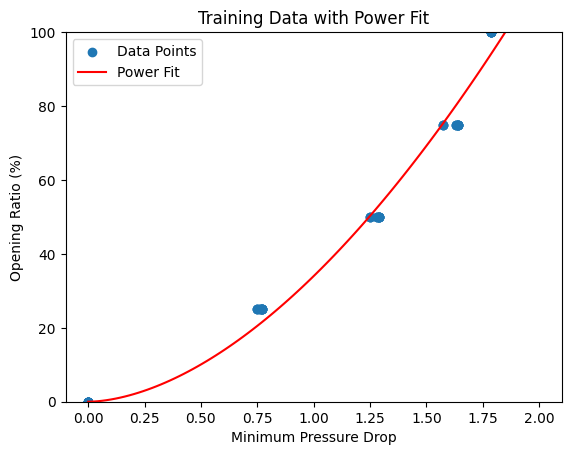

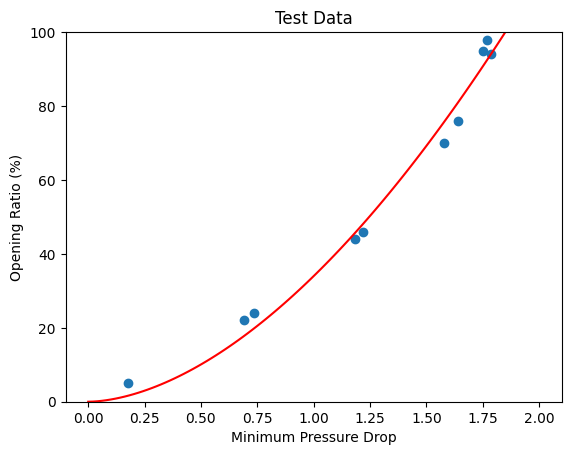

In [16]:
PDT = np.array([min(Pressure_Drop_OR[0][i], Pressure_Drop_OR[1][i], Pressure_Drop_OR[2][i], Pressure_Drop_OR[3][i]) for i in range(len(Pressure_Drop_OR[0]))])
PDTe = np.array([min(Pressure_Drop_test_OR[0][i], Pressure_Drop_test_OR[1][i], Pressure_Drop_test_OR[2][i], Pressure_Drop_test_OR[3][i]) for i in range(len(Pressure_Drop_test_OR[0]))])

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming you have defined OR_Train and PDT arrays

# Define the power function
def power_fit(x, a, b):
    return a * np.power(x, b)

# Filter out data where OR_Train is not equal to 100
filtered_data = [(OR_Train[i], PDT[i]) for i in range(len(OR_Train)) if OR_Train[i] != 100]
filtered_OR_Train1, filtered_PDT1 = zip(*filtered_data)

# Filter out data where OR_Test is not equal to 100
filtered_dataT = [(OR_Test[i], PDTe[i]) for i in range(len(OR_Test)) if OR_Test[i] != 100]
filtered_OR_Test, filtered_PDTe = zip(*filtered_dataT)

filtered_PDT = filtered_PDT1 + (1.78450085,) * 8
filtered_OR_Train = filtered_OR_Train1 + (100,) * 8

# Use curve_fit to find the parameters a and b for the power function
params, covariance = curve_fit(power_fit, filtered_PDT, filtered_OR_Train)

# Create a range of x values for the line
x_range = np.linspace(0, 2, 100)

# Calculate the corresponding y values using the fitted parameters
y_fit = power_fit(x_range, *params)

# Plot the original data points
plt.scatter(filtered_PDT, filtered_OR_Train, label='Data Points')

# Plot the power line of best fit
plt.plot(x_range, y_fit, color='red', label='Power Fit')

plt.title('Training Data with Power Fit')
plt.xlabel('Minimum Pressure Drop')
plt.ylabel('Opening Ratio (%)')
plt.legend()
plt.ylim(0,100)
plt.show()

# Plotting for Test data
x_range = np.linspace(0, 2, 100)
plt.scatter([PDTe[i] for i in range(len(OR_Test)) if OR_Test[i] != 100], [OR_Test[i] for i in range(len(OR_Test)) if OR_Test[i] != 100])
# Plot the power line of best fit
plt.plot(x_range, y_fit, color='red', label='Power Fit')
plt.title('Test Data')
plt.xlabel('Minimum Pressure Drop')
plt.ylabel('Opening Ratio (%)')
plt.ylim(0,100)
plt.show()

In [72]:
PDTEF = [PDTe[i] for i in range(len(OR_Test)) if OR_Test[i] != 100]

y_fit = power_fit(PDTEF, *params)

# Calculate the differences between actual and predicted test values
differences = np.array(filtered_OR_Test) - y_fit

# Print the list of differences
print("Differences between actual and predicted test values:")
print(differences)

Max_points = 20*5 + 40*5 

# Space craft 1
Final1 = sum(20 - abs(differences[0:5]))
# Space craft 4
Final4 = 2*sum(20 - abs(differences[5:10]))

print((Final1+Final4)/Max_points)
print(Final4)

Differences between actual and predicted test values:
[ 4.19383364 -5.08102154  3.40814882 -2.18018091  5.37888067 -1.66052448
  0.14139572  4.30812223 -5.82445512  4.10786408]
0.8255773704639807
167.91527672526746


In [18]:
print(params)

[33.98586108  1.75406123]
